<span style="color:#6495ED; font-size:2em">Problem Statement</span>

<strong>Given:</strong> A dataset from eCommerce site, which contains 

<ul>
    <li>user id</li>
    <li>product id</li>
    <li>rating</li>
    <li>time stamp</li>
</ul>

from the electronics dataset is given.

<strong>To Do:</strong> To make a recommendation system that recommends at least five(5) new products based on the user's habits.

<strong>Learning Outcomes:</strong>

● ExploratoryDataAnalysis
● DataWrangling
● BuildaPopularityrecommendermodel 
● BuildCollaborativeFilteringmodel

<span style="color:#6495ED; font-size:2em">Importing Essential Libraries for This Exercise</span>

In [640]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

<span style="color:#6495ED; font-size:2em">Importing the data the given CSV file</span>

In [641]:
col_names=["User Id", "Product Id","Rating","Time Stamp"] # Adding column names to the data 
data = pd.read_csv("ratings_Electronics_DATA.csv",header=None,names=col_names)

In [642]:
data.head()

User Id  Product Id  Rating  Time Stamp
0   AKM1MP6P0OYPR  0132793040     5.0  1365811200
1  A2CX7LUOHB2NDG  0321732944     5.0  1341100800
2  A2NWSAGRHCP8N5  0439886341     1.0  1367193600
3  A2WNBOD3WNDNKT  0439886341     3.0  1374451200
4  A1GI0U4ZRJA8WN  0439886341     1.0  1334707200

<span style="color:#6495ED; font-size:2em">EDA</span>

In [643]:
data.shape # Checking the data size 

(1279208, 4)

In [644]:
len(data["User Id"].unique()) # number of unique users 

934814

In [645]:
len(data["Product Id"].unique()) # number of unique products 

74540

In [646]:
data.describe().transpose()

count          mean           std       min           25%  \
Rating      1279208.0  3.980653e+00  1.395642e+00       1.0  3.000000e+00   
Time Stamp  1279208.0  1.254768e+09  1.046205e+08  136399.0  1.179101e+09   

                     50%           75%           max  
Rating      5.000000e+00  5.000000e+00  5.000000e+00  
Time Stamp  1.255306e+09  1.356307e+09  1.406074e+09

<strong>Observation:</strong> 
<ul>
    <li> Time stamp adds no value and can be dropped </li>
        <li> The minimum rating is 1 and the maximum rating is 5</li>
        <li> More than 50% of the data has 5 rating</li>
</ul>

In [647]:
data.isnull().sum()

User Id       0
Product Id    0
Rating        0
Time Stamp    0
dtype: int64

<strong>Observation:</strong> 
<ul>
    <li> There are no null values</li>
</ul>

In [648]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1279208 entries, 0 to 1279207
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   User Id     1279208 non-null  object 
 1   Product Id  1279208 non-null  object 
 2   Rating      1279208 non-null  float64
 3   Time Stamp  1279208 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 39.0+ MB


<strong>Observation:</strong> 
<ul>
    <li> All the data types of the columns are suitable for recommendation systems development</li>
</ul>

/Users/cashwin/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rating', ylabel='Density'>

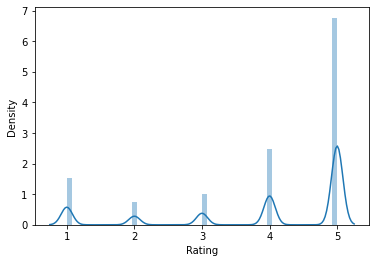

In [649]:
sns.distplot(data['Rating'])

In [650]:
data['Rating'].value_counts()

5.0    692985
4.0    254172
1.0    155027
3.0    101395
2.0     75629
Name: Rating, dtype: int64

In [651]:
data['Time Stamp'] = pd.to_datetime(data['Time Stamp'], unit='ms')

In [652]:
data['Time Stamp'] = data['Time Stamp'].dt.year

In [653]:
data.head()

User Id  Product Id  Rating  Time Stamp
0   AKM1MP6P0OYPR  0132793040     5.0        1970
1  A2CX7LUOHB2NDG  0321732944     5.0        1970
2  A2NWSAGRHCP8N5  0439886341     1.0        1970
3  A2WNBOD3WNDNKT  0439886341     3.0        1970
4  A1GI0U4ZRJA8WN  0439886341     1.0        1970

In [654]:
data['Time Stamp'].value_counts()

1970    1279208
Name: Time Stamp, dtype: int64

<strong>Observation:</strong> 
<ul>
    <li> All the time stamp is from 1970</li>
    <li> This adds no value, so the tijmestamp can be dropeed</li>
</ul>

In [655]:
data.drop('Time Stamp',axis='columns', inplace=True)

In [656]:
data.head() # checking if timestamp is dropped

User Id  Product Id  Rating
0   AKM1MP6P0OYPR  0132793040     5.0
1  A2CX7LUOHB2NDG  0321732944     5.0
2  A2NWSAGRHCP8N5  0439886341     1.0
3  A2WNBOD3WNDNKT  0439886341     3.0
4  A1GI0U4ZRJA8WN  0439886341     1.0

<span style="color:#6495ED; font-size:2em">Take a subset of the dataset to make it less sparse/ denser. ( For example, keep the users only who has given 50 or more number of ratings )</span>

In [657]:
ct = pd.value_counts(data["User Id"]) 

In [658]:
ct = ct[ct >=50]

In [659]:
ct.index

Index(['A5JLAU2ARJ0BO', 'A231WM2Z2JL0U3', 'A6FIAB28IS79', 'A25HBO5V8S8SEA',
       'AKT8TGIT6VVZ5', 'AT6CZDCP4TRGA', 'A3OXHLG6DIBRW8', 'A11D1KHM7DVOQK',
       'A203OCQQ12MAVT', 'A2B7BUH8834Y6M', 'A680RUE1FDO8B', 'A2R6RA8FRBS608',
       'A1F9Z42CFF9IAY', 'A2AEZQ3DGBBLPR', 'A1FR68QH6Z4YZM', 'A1435P5AMCPB3X',
       'AWPODHOB4GFWL', 'A1JWSDDIH5Z7DV', 'AGHZXQL9F94T9', 'A1MJMYLRTZ76ZX',
       'A149RNR5RH19YY', 'A2AY4YUOX2N1BQ', 'A2XRMQA6PJ5ZJ8', 'A1ODOGXEYECQQ8',
       'A7Y6AVS576M03', 'A38QEATH3NODFM', 'A2CL818RN52NWN', 'A1RPTVW5VEOSI',
       'A250AXLRBVYKB4', 'A12DLJESJKM1OQ', 'ABH9D1TEOJ56E', 'A1VQHH85U7PX0',
       'AGXV8E7XK9J6H', 'A15QYHQH80W30L', 'A3NCIN6TNL0MGA', 'A7QMQBGJ2TCQG',
       'ADLVFFE4VBT8', 'ARBKYIVNYWK3C', 'AT2J7H5TRZM8Z', 'A11KZ906QD08C5',
       'ALUNVOQRXOZIA', 'A1EKSETIBS9ETQ', 'A2BGZ52M908MJY', 'A2UQK3DAZ8NO2T',
       'A3REK3OFONWB1Q', 'A17BUUBOU0598B', 'A1NNMOD9H36Q8E', 'A1UEL5C1N6E5SE',
       'A1KD8NJPZ01R37', 'A32QOZWIKQDNZX', 'A5KMMY627T3W', 'A3QQGPI3CTV

In [660]:
data = data[data["User Id"].isin(ct.index)]

In [661]:
data_cp = data.copy(deep=True) # Creating a copy of the dataset of later use 

In [662]:
data.shape

(4633, 3)

### Products by average rating 

In [663]:
data.groupby('Product Id')['Rating'].mean().head() 

Product Id
1400532655    3.0
1400599997    1.0
787988002X    5.0
9043413585    3.0
9981719005    3.0
Name: Rating, dtype: float64

### Top Rated Products 

In [664]:
data.groupby('Product Id')['Rating'].mean().sort_values(ascending=False).head() 

Product Id
B0007OV45O    5.0
B000068O4J    5.0
B000068O3C    5.0
B0002L2RXK    5.0
B000068O4D    5.0
Name: Rating, dtype: float64

### Products that have maximum number of rating 

In [665]:
data.groupby('Product Id')['Rating'].count().sort_values(ascending=False).head() 

Product Id
B000JMJWV2    10
B00005LEN4    10
B00004ZCJE     8
B00004SB92     7
B000LRMS66     6
Name: Rating, dtype: int64

<span style="color:#6495ED; font-size:2em">Build Popularity Recommender model</span>



In [666]:
ratings_mean_count = pd.DataFrame(data.groupby('Product Id')['Rating'].mean())

In [667]:
ratings_mean_count['rating_counts'] = pd.DataFrame(data.groupby('Product Id')['Rating'].count())

In [668]:
ratings_mean_count.sort_values(["Rating","rating_counts"],ascending=False).head(100)

Rating  rating_counts
Product Id                       
B0007QKMQY     5.0              6
B000BY52NK     5.0              6
B00005LENO     5.0              5
B00015GYU4     5.0              5
B000HGIWN4     5.0              5
...            ...            ...
B0000A0AJH     5.0              2
B0000AGAWV     5.0              2
B0000BZL1P     5.0              2
B0000BZL28     5.0              2
B0000BZL5A     5.0              2

[100 rows x 2 columns]

<strong>Result</strong> 
<ul>
    <li> The above are the list of products that have high rating with significant support </li>
    <li> These set of products can be recommended to any user, where no other information is available </li>
</ul>

<span style="color:#6495ED; font-size:2em">Add the libraries needed for Collaborative Filtering</span>


In [669]:
from surprise import KNNWithMeans
from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise import Reader
from surprise import NormalPredictor
from surprise.model_selection import cross_validate

<span style="color:#6495ED; font-size:2em">Split the data randomly into a train and test dataset. ( For example, split it in
70/30 ratio)</span>

In [670]:
reader = Reader(rating_scale=(1, 5)) # setting the reader configuration in surprise

data = Dataset.load_from_df(data[["User Id","Product Id","Rating"]],reader) # Converting to a surprie object

trainset, testset = train_test_split(data, test_size=.30,random_state=42) # splitting to test, train set 

In [671]:
data.df.head() #checking if the data is transformed correctly 

User Id  Product Id  Rating
2082  A2ZR3YTMEEIIZ4  1400532655     5.0
2162   A5JLAU2ARJ0BO  1400532655     1.0
3050   ALUNVOQRXOZIA  1400599997     1.0
4331  A3QQGPI3CTV9SX  787988002X     5.0
4614   A1VQHH85U7PX0  9043413585     3.0

In [672]:
print(trainset.to_raw_uid(1)) # Sanity Check 

A7QMQBGJ2TCQG


<span style="color:#6495ED; font-size:2em">Build Collaborative Filtering Models</span>

## SVD Model based collaborative Filtering

### Identifying the right number of Latent features for SVD

In [673]:
score_svd = 100000 # setting a high RMSE value 
n_fac_svd = 0
for i in range(0,21):
    svd_model = SVD(n_factors=i)
    svd_model.fit(trainset)
    test_perd = svd_model.test(testset)
    if( accuracy.rmse(test_perd) < score_svd ): # gathering the configuration for the highest RMSE value
        score_svd = accuracy.rmse(test_perd)
        n_fac_svd = i

RMSE: 1.0532
RMSE: 1.0532
RMSE: 1.0529
RMSE: 1.0529
RMSE: 1.0531
RMSE: 1.0541
RMSE: 1.0537
RMSE: 1.0548
RMSE: 1.0539
RMSE: 1.0540
RMSE: 1.0558
RMSE: 1.0537
RMSE: 1.0535
RMSE: 1.0534
RMSE: 1.0534
RMSE: 1.0543
RMSE: 1.0548
RMSE: 1.0538
RMSE: 1.0537
RMSE: 1.0554
RMSE: 1.0527
RMSE: 1.0527
RMSE: 1.0541
RMSE: 1.0530


In [674]:
svd_model_final = SVD(n_factors=n_fac_svd)
svd_model_final.fit(trainset)

In [675]:
test_perd_svd = svd_model.test(testset)

scores_svd = [accuracy.rmse(test_perd_svd),accuracy.mse(test_perd_svd),accuracy.mae(test_perd_svd),accuracy.fcp(test_perd_svd)]

svd_df = pd.DataFrame(np.array(scores_svd).reshape(1,4),columns=["RMSE","MSE","MAE","FCP"])

svd_df

RMSE: 1.0530
MSE: 1.1087
MAE:  0.7873
FCP:  0.2298


RMSE       MSE       MAE       FCP
0  1.052966  1.108738  0.787349  0.229778

In [676]:
pred_svd = pd.DataFrame(test_perd)

In [677]:
pred_svd

uid         iid  r_ui       est                    details
0      A7Y6AVS576M03  B000DIM9AS   5.0  4.701048  {'was_impossible': False}
1     A1ODOGXEYECQQ8  B0002SAE56   4.0  4.592518  {'was_impossible': False}
2     A1KD8NJPZ01R37  B0000CH58M   5.0  3.326409  {'was_impossible': False}
3      A5JLAU2ARJ0BO  B00008BO73   5.0  3.822040  {'was_impossible': False}
4     A1435P5AMCPB3X  B00004I9W2   5.0  4.373580  {'was_impossible': False}
...              ...         ...   ...       ...                        ...
1385   ALUNVOQRXOZIA  B000MP831G   5.0  3.673921  {'was_impossible': False}
1386  A231WM2Z2JL0U3  B000051SHL   5.0  4.253850  {'was_impossible': False}
1387  A1JWSDDIH5Z7DV  B0007OW57K   5.0  5.000000  {'was_impossible': False}
1388  A2UQK3DAZ8NO2T  B000ENPDSW   4.0  4.218528  {'was_impossible': False}
1389  A231WM2Z2JL0U3  B000063CWO   4.0  4.253850  {'was_impossible': False}

[1390 rows x 5 columns]

<strong>Result</strong> 
<ul>
    <li> A Collaborative Filtering Model based on SVD has been build</li>
    <li> The model performance scores have been calculated</li>
    
</ul>

## K Means Model based collaborative Filtering

### Identifying the optinal K

In [678]:
score_knn = 100000
k_opt = 0
for x in range(5,100,5):
    knn_model = KNNWithMeans(k=x, sim_options={'name': 'pearson_baseline', 'user_based': True})
    knn_model.fit(trainset)
    test_perd = svd_model.test(testset)
    if( accuracy.rmse(test_perd) < score_knn ): 
        score_knn = accuracy.rmse(test_perd)
        k_opt = x
    

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0530
RMSE: 1.0530
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0530
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0530
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0530
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0530
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0530
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0530
Estimating biases using als...
Computing the pearson_baseline similarity matr

In [679]:
knn_model_final = KNNWithMeans(k=k_opt, sim_options={'name': 'pearson_baseline', 'user_based': True})
knn_model_final.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [680]:
test_perd_knn = knn_model_final.test(testset)

scores_knn = [accuracy.rmse(test_perd_knn),accuracy.mse(test_perd_knn),accuracy.mae(test_perd_knn),accuracy.fcp(test_perd_knn)]

knn_df = pd.DataFrame(np.array(scores_knn).reshape(1,4),columns=["RMSE","MSE","MAE","FCP"])

knn_df

RMSE: 1.1203
MSE: 1.2550
MAE:  0.8630
FCP:  0.2144


RMSE       MSE       MAE       FCP
0  1.120275  1.255016  0.863008  0.214421

In [681]:
pred_knn = pd.DataFrame(test_perd_knn)
pred_knn

uid         iid  r_ui       est  \
0      A7Y6AVS576M03  B000DIM9AS   5.0  4.220783   
1     A1ODOGXEYECQQ8  B0002SAE56   4.0  4.220783   
2     A1KD8NJPZ01R37  B0000CH58M   5.0  3.200000   
3      A5JLAU2ARJ0BO  B00008BO73   5.0  4.220783   
4     A1435P5AMCPB3X  B00004I9W2   5.0  4.220783   
...              ...         ...   ...       ...   
1385   ALUNVOQRXOZIA  B000MP831G   5.0  3.463415   
1386  A231WM2Z2JL0U3  B000051SHL   5.0  4.220783   
1387  A1JWSDDIH5Z7DV  B0007OW57K   5.0  4.981132   
1388  A2UQK3DAZ8NO2T  B000ENPDSW   4.0  4.220783   
1389  A231WM2Z2JL0U3  B000063CWO   4.0  4.220783   

                                                details  
0     {'was_impossible': True, 'reason': 'User and/o...  
1     {'was_impossible': True, 'reason': 'User and/o...  
2              {'actual_k': 0, 'was_impossible': False}  
3     {'was_impossible': True, 'reason': 'User and/o...  
4     {'was_impossible': True, 'reason': 'User and/o...  
...                                                 ...  
1385           {'actual_k': 0, 'was_impossible': False}  
1386  {'was_impossible': True, 'reason': 'User and/o...  
1387           {'actual_k': 0, 'was_impossible': False}  
1388  {'was_impossible': True, 'reason': 'User and/o...  
1389  {'was_impossible': True, 'reason': 'User and/o...  

[1390 rows x 5 columns]

<strong>Result</strong> 
<ul>
    <li> A Collaborative Filtering Model based on KNN has been build</li>
    <li> The model performance scores have been calculated</li>
    
</ul>



|     | RMSE | MSE  | MAE  | FCP  |
|-----|------|------|------|------|
| SVD | 1.05 | 1.11 | 0.78 | 0.21 |
| KNN | 1.12 | 1.25 | 0.86 | 0.21 |

<strong>Model Comparision</strong> 
<ul>
    <li> The SVD seems to be performing better than the KNN</li>
    
</ul>

<span style="color:#6495ED; font-size:2em">Get top - K ( K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new
products.</span>

In [682]:
reader = Reader(rating_scale=(1, 5)) # setting the reader configuration in surprise

data_cp = Dataset.load_from_df(data_cp[["User Id","Product Id","Rating"]],reader) #converting the copy of the data to surprise object 

In [683]:
data_cp.df.head() # sanity check 

User Id  Product Id  Rating
2082  A2ZR3YTMEEIIZ4  1400532655     5.0
2162   A5JLAU2ARJ0BO  1400532655     1.0
3050   ALUNVOQRXOZIA  1400599997     1.0
4331  A3QQGPI3CTV9SX  787988002X     5.0
4614   A1VQHH85U7PX0  9043413585     3.0

In [684]:
trainset = data_cp.build_full_trainset() # Building the training Set 

In [685]:
svd_model_final = SVD(n_factors=n_fac_svd) # Running the model
svd_model_final.fit(trainset)

In [686]:
predset = trainset.build_anti_testset() # Getting the list of users and products that are not in the list

In [687]:
predictions = svd_model_final.test(predset) # predicting for the testset

In [688]:
from collections import defaultdict
def get_top_n(predictions, n=5):  # Fucntion to get the top 5 products for a given user
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [689]:
top_n = get_top_n(predictions, n=5)

In [690]:
predictions

[Prediction(uid='A2ZR3YTMEEIIZ4', iid='1400599997', r_ui=4.225987481113749, est=3.893774315958586, details={'was_impossible': False}),
 Prediction(uid='A2ZR3YTMEEIIZ4', iid='787988002X', r_ui=4.225987481113749, est=4.166728639386332, details={'was_impossible': False}),
 Prediction(uid='A2ZR3YTMEEIIZ4', iid='9043413585', r_ui=4.225987481113749, est=4.004970836006786, details={'was_impossible': False}),
 Prediction(uid='A2ZR3YTMEEIIZ4', iid='9981719005', r_ui=4.225987481113749, est=4.087923334745888, details={'was_impossible': False}),
 Prediction(uid='A2ZR3YTMEEIIZ4', iid='998376234X', r_ui=4.225987481113749, est=3.915401144929692, details={'was_impossible': False}),
 Prediction(uid='A2ZR3YTMEEIIZ4', iid='B000000O48', r_ui=4.225987481113749, est=4.278798703736669, details={'was_impossible': False}),
 Prediction(uid='A2ZR3YTMEEIIZ4', iid='B000001OL6', r_ui=4.225987481113749, est=4.0977633206115245, details={'was_impossible': False}),
 Prediction(uid='A2ZR3YTMEEIIZ4', iid='B000001OMI', r_

In [691]:
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

A2ZR3YTMEEIIZ4 ['B000JMJWV2', 'B000LRMS66', 'B0007QKMQY', 'B000MP831G', 'B000ELC148']
A5JLAU2ARJ0BO ['B00065X51U', 'B0009JR3N4', 'B00022RV94', 'B0009U6YQK', 'B000068IGG']
ALUNVOQRXOZIA ['B000JMJWV2', 'B0007QKMQY', 'B000BY52NK', 'B000EPHR0C', 'B00004Z5M1']
A3QQGPI3CTV9SX ['B000031KIM', 'B00004S9AK', 'B000050AQ7', 'B000051123', 'B00006J6RN']
A1VQHH85U7PX0 ['B000M17AVO', 'B0007QKMQY', 'B00006HZ0L', 'B00005QXWI', 'B000IGGCCG']
ADLVFFE4VBT8 ['B0007QKMQY', 'B00015GYU4', 'B000BY52NK', 'B00006IW1X', 'B00006J6RN']
A250AXLRBVYKB4 ['B000HGIWN4', 'B000075UZ7', 'B00009W3TY', 'B0007QKMQY', 'B0009JKVZG']
A2AEZQ3DGBBLPR ['B0000C20T5', 'B000N99BBC', 'B000I1ZWRC', 'B00009R89C', 'B00008NUI2']
A2R6RA8FRBS608 ['B0007QKMQY', 'B00015GYU4', 'B000MP831G', 'B000I1ZWRC', 'B000LRMS66']
A680RUE1FDO8B ['B0007QKMQY', 'B000M17AVO', 'B00009MDBQ', 'B00015GYU4', 'B00005MNSS']
A11D1KHM7DVOQK ['B000DZFWL4', 'B0000A0AJH', 'B00008OE46', 'B00015GYU4', 'B00008IM7P']
A3NCIN6TNL0MGA ['B0007QKMQY', 'B000LRMS66', 'B0000DB4D1', 'B

<span style="color:#6495ED; font-size:2em">Summary</span>

<strong>Highlights </strong> 
<ul>
    <li> The data was loaded, EDA & Preprocessing was done</li>
    <li> The dataset was reduced in size to just the number of user who have given more than 50 ratings </li>
    <li> The popularity based recommendations were generated, such that products can be recommendaed when there are no other inputs </li>
    <li> Collaborative Filtering Models using SVD and KNN were built and metrics were compared - SVD proved to be a better model</li>
    <li> Parameter Tuning for SVD was done to achieve the best scores possible</li>
     <li> The SVD model were used to predict top 5 recommendations for the users </li>
    
</ul>